# How To Create New Columns Derived From Existing Columns
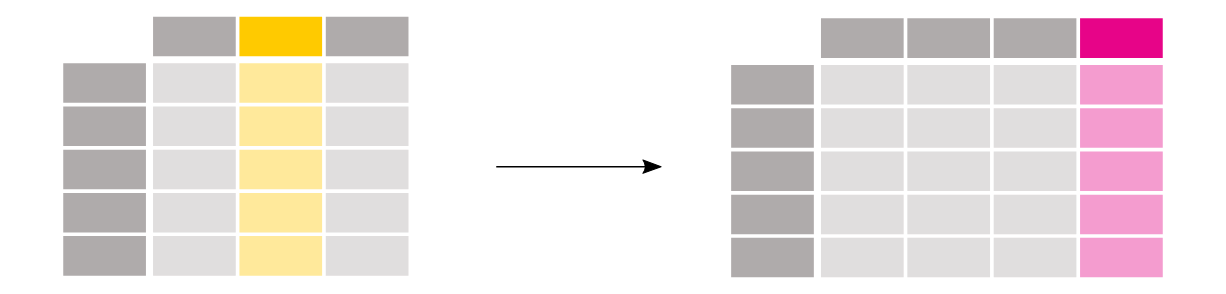

In [1]:
import pandas as pd

In [2]:
air_quality = pd.read_csv("../../air_quality_datasets/air_quality_no2.csv", index_col=0, parse_dates=True)


In [3]:
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


Let's say that I want to express the NO<sub>2</sub> concentration of the station in London in mg m<sup>-3<sup>

(if we assume temp of 25 degs C & pressure 1013 hPa, the conversion factor is 1.882)

In [4]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"]*1.882

In [5]:
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


##### To create a new column, use the `[]` brackets with the new column name at the left side of the assignment.

**Note**:

The calculation of the values is done element-wise. This means all values in the given column are multiplied by the value 1.882 at once. You do not need to use a loop to iterate each of the rows!

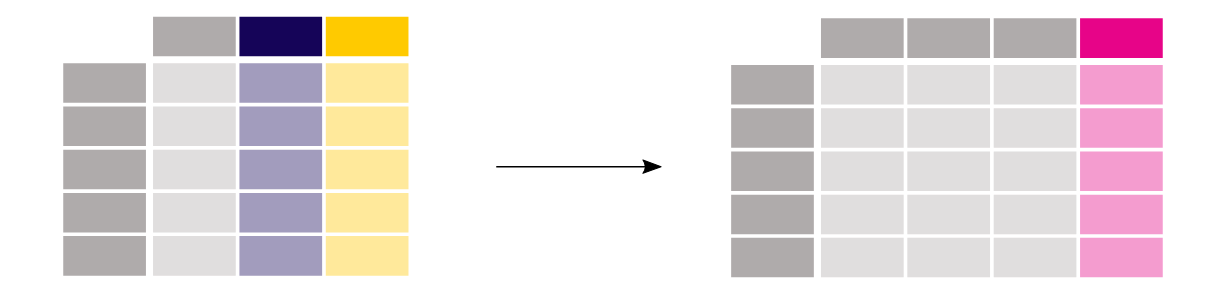

Now, I want to check the ratios of the values in Paris Vs. Antwerp and save the result in a new column

In [6]:
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"]/air_quality["station_antwerp"]
)

In [7]:
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


The calculation is again *element-wise*, so the `/` is applied to each of the pairs of corresponding rows for paris and antwerp. 

Also other mathematical operators (`+`, `-`,`*`, `/`,…) or logical operators (`<`, `>`,`==`,…) work element-wise. The latter was already used in the subset data tutorial to filter rows of a table using a conditional expression.

If you want more *advanced* mathematical operation or logic, you caqn use arbitrary Python code via apply().

#### Now, I want to rename the data columns to the corresponding station identifiers used by OpenAQ.

In [8]:
air_quality_renamed = air_quality.rename(
    columns={
            "station_antwerp": "BETR801",
            "station_paris": "FR04014",
            "station_london": "London Westminster",
        }
)

In [9]:
air_quality_renamed.head()


,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


The `rename()` function can be used for both row labels and column labels. Provide a dicitonary with the keys as the currentnames and the values as the corresponding new column names.
> The mapping doesn't have to be restricted to fixed names only, but can be a mapping function as well. For example, converting the column names to lowercase letters can be done using a function as well:

In [10]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)

In [11]:
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


## REMEMBER
* Create a new column by assigning the output to the DataFrame with a new column name in between the `[]`.

* Operations are element-wise, no need to loop over rows.

* Use `rename()` with a dictionary or function argument to rename row labels or column names.